In [17]:
import xarray as xr
import numpy as np
from xhistogram.xarray import histogram
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import argopy 

In [5]:
ds = argopy.DataFetcher().region([-20, -8, 36, 44, 0, 200, '2020-01-01', '2020-12-31']).load().data
ds = ds.argo.point2profile()

In [16]:
# define latitude and longitude bins
binsize = 1.0 # 1°x1° bins
lon_bins = np.arange(-20, -8, binsize)
lat_bins = np.arange(36, 44, binsize)

In [20]:
# either 
def xhist(ds):
    h = histogram(ds.LONGITUDE, ds.LATITUDE, bins=[lon_bins, lat_bins])
    return h

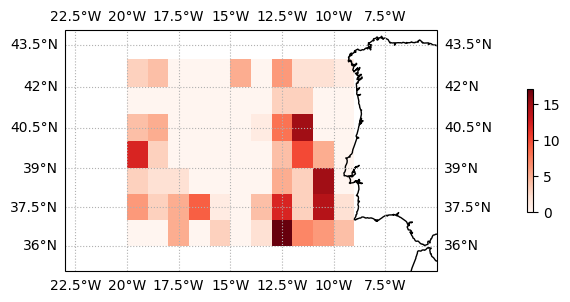

In [48]:
#full distrib
dsf = xhist(ds)

f = plt.figure(figsize=(6,4))
ax = f.add_subplot(projection=ccrs.Mercator())
ax.coastlines()
ax.set_extent([-23,-5,35,44])
ax.gridlines(linestyle=':',draw_labels=True)
a=ax.pcolormesh(dsf.LONGITUDE_bin,dsf.LATITUDE_bin,dsf.transpose(),transform=ccrs.PlateCarree(),cmap=plt.get_cmap('Reds'),vmin=0)
cb=plt.colorbar(a,shrink=0.4,anchor=(1.05,0.5))

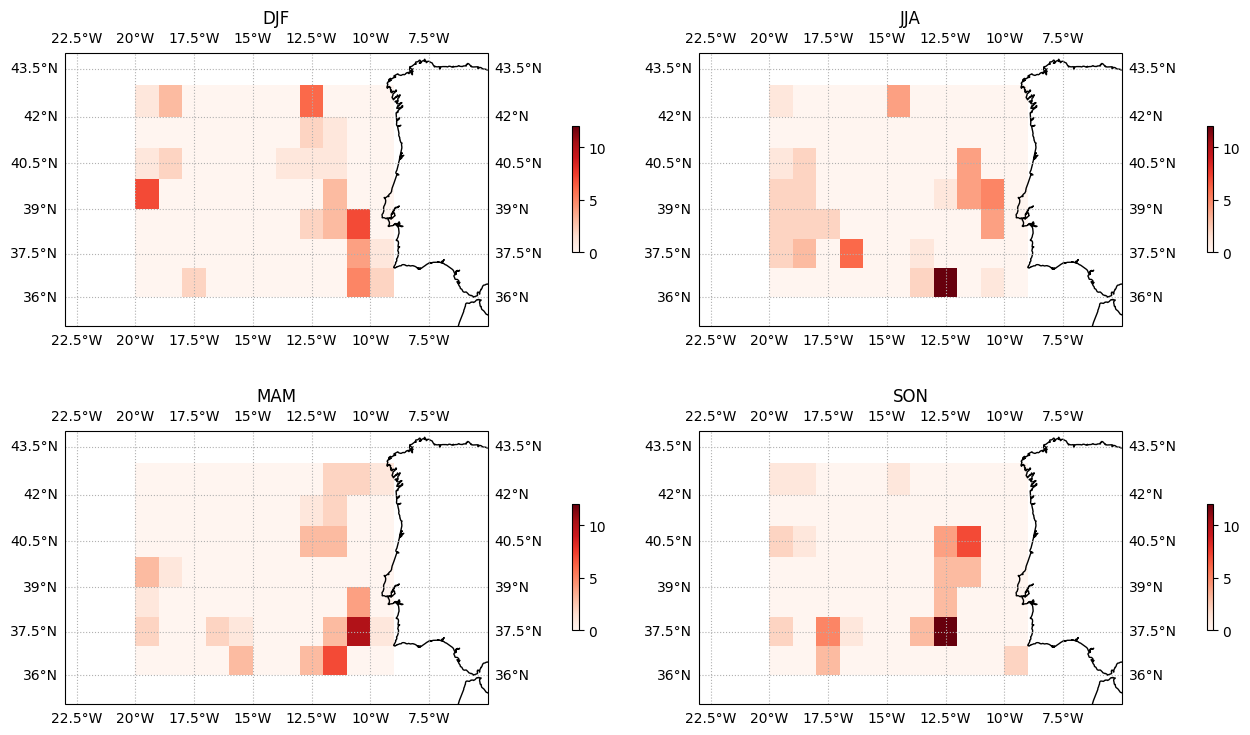

In [53]:
#per season distrib
dsg = ds.groupby('TIME.season').apply(xhist)

f = plt.figure(figsize=(15,9))
for s in range(len(dsg.season)):
    sdsg = dsg.isel(season=s)
    ax = f.add_subplot(2,2,s+1,projection=ccrs.Mercator())
    ax.coastlines()
    ax.set_extent([-23,-5,35,44])
    ax.gridlines(linestyle=':',draw_labels=True)
    a=ax.pcolormesh(sdsg.LONGITUDE_bin,sdsg.LATITUDE_bin,sdsg.transpose(),transform=ccrs.PlateCarree(),cmap=plt.get_cmap('Reds'),vmin=0,vmax=12)
    plt.colorbar(a,shrink=0.4,anchor=(0.8,0.5))
    ax.set_title(dsg.season.values[s])